# Imports and global variables

In [1]:
import numpy as np
from numpy import random
from numpy.random import randn
from numpy.random import seed
import math

seed(1)

number_of_experiments = 5
number_of_coin_tosses_per_trial = 25

maximum_number_of_iterations = 10

# Experiment properties: Prob to choose coin A for the trial
p_A = 0.5
p_B = 1 - p_A
# Coin properties: Prob for heads and tails
p_heads_A = 0.9
p_heads_B = 0.2

Use and modify and download the expectation-maximization (EM) Python program for two coins, as developed in the lecture. Generate an unrepresentative series of exactly $n = 5 \times 25$ total coin flips (5 times 25 flips with the randomly selected coin), given two coins thrown with equal probability (1/2), but with different heads probabilities, $p_A$ (coin A), and $p_B$ (coin B), respectively. Choose and fix a single parameter combination within $0.1 < p_A < 0.9$ and $0.1 < p_B < 0.9.$ This means to generate a series of (H)eads and (T)ails that is virtually incompatible, i.e. highly unlikely, given the ground truth $\theta = (p_A, p_B)$ of your choice, yet being a valid realization (instance) of the underlying fair double-coin process. Once this highly unlikely (say, unlucky) realization is found and generated, analyze this given instance with the EM algorithm. The EM steps will show convergence to some (MLE) estimates of ${p'}_A$ and ${p'}_B$, which best represent the unlikely dataset but deviate substantially from $p_A$ and $p_B$.
The solution with the largest value of
$$score = min\left[abs\left(log\left({p'}_A/p_A\right)\right), abs\left(log\left({p'}_B/p_B\right)\right)\right]$$
(that you need to compute and print) wins a price, handed over by the lecturer -- but only if this value is unique among the submissions. If it is not, the 2nd largest score wins, if unique, and so on. If there is no winner, the present may, sadly, be thrown out of one randomly selected window.

# Table of contents
## Data generation 
## Show expectation maximization to some MLE estimates of  $𝑝'_𝐴$  and  $𝑝'_𝐵$ , which best represent the unlikely dataset but deviate substantially from $𝑝_𝐴$  and  $𝑝_𝐵$ . The solution with the largest value of (that you need to compute and print) wins

# 1. Data generation

In [2]:
def generate_rolls_data(number_of_experiments, number_of_coin_tosses_per_trial, p_heads_A, p_heads_B, p_A, p_B):
    list_rolls = []
    A_number_of_heads = 0
    B_number_of_heads = 0
    A_number_of_tails = 0
    B_number_of_tails = 0
    
    for i in range(0, number_of_experiments):
        trial = ''
        A=0
        # Choose coin: p fixed for single trial
        if (random.uniform(0, 1) < p_A): 
            p = p_heads_A
            A = 1
        else:
            p = p_heads_B
            A = 0

        for j in range(0, number_of_coin_tosses_per_trial):
            outcome = random.uniform(0, 1)
            if (outcome < p):
                trial += "H"
                if A == 0: 
                    A_number_of_heads += 1
                else:
                    B_number_of_heads += 1
            else: 
                trial += "T"
                if (A==0): 
                    A_number_of_tails += 1
                else:
                    B_number_of_tails += 1
        list_rolls.append(trial)
    
    return list_rolls, A_number_of_heads, B_number_of_heads, A_number_of_tails, B_number_of_tails

list_rolls, A_number_of_heads, B_number_of_heads, A_number_of_tails, B_number_of_tails = generate_rolls_data(number_of_experiments, number_of_coin_tosses_per_trial, p_heads_A, p_heads_B, p_A, p_B)

#0:	0.800 0.500
#1:	0.907 0.220
#2:	0.907 0.220
#3:	0.907 0.220
#4:	0.907 0.220
#5:	0.907 0.220
#6:	0.907 0.220
#7:	0.907 0.220
#8:	0.907 0.220
#9:	0.907 0.220
MLE estimates from data (finite sample size estimates!):
0.220 0.907


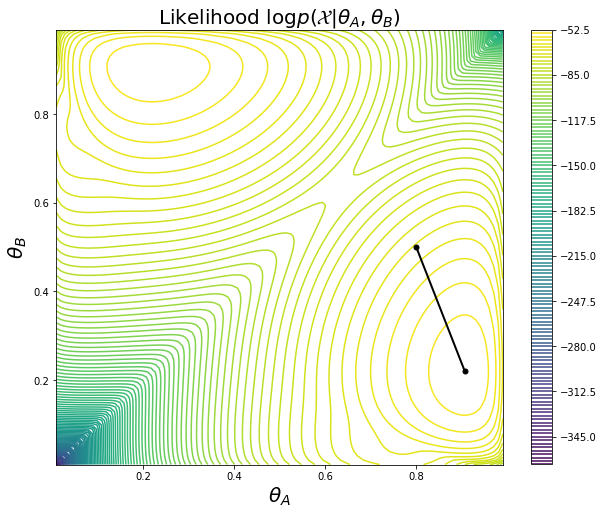

In [3]:
def coin_em(rolls, theta_A=None, theta_B=None, maxiter=maximum_number_of_iterations):
    # Initial Guess
    theta_A = theta_A or random.random()
    theta_B = theta_B or random.random()
    # theta vector
    thetas = [(theta_A, theta_B)]
    # Iterate
    for c in range(maxiter):
        print("#%d:\t%0.3f %0.3f" % (c, theta_A, theta_B))
        heads_A, tails_A, heads_B, tails_B = e_step(rolls, theta_A, theta_B)
        theta_A, theta_B = m_step(heads_A, tails_A, heads_B, tails_B)
        
    thetas.append((theta_A,theta_B))    
    return thetas, (theta_A,theta_B)

def e_step(rolls, theta_A, theta_B):
    """Produce the expected value for heads_A, tails_A, heads_B, tails_B 
    over the rolls given the coin biases"""
    
    heads_A, tails_A = 0, 0
    heads_B, tails_B = 0, 0
    for trial in rolls:
        likelihood_A = coin_likelihood(trial, theta_A)
        likelihood_B = coin_likelihood(trial, theta_B)
        p_A = likelihood_A / (likelihood_A + likelihood_B)
        p_B = likelihood_B / (likelihood_A + likelihood_B)
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T")
    return heads_A, tails_A, heads_B, tails_B

def m_step(heads_A, tails_A, heads_B, tails_B):
    """Produce the values for theta that maximize the expected number of heads/tails"""
    theta_A = heads_A / (heads_A + tails_A)
    theta_B = heads_B / (heads_B + tails_B)
    
    return theta_A, theta_B

def coin_likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H")
    flips = len(roll)
    
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

def plot_coin_likelihood(rolls, thetas=None):
    # grid
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    X,Y = np.meshgrid(xvals, yvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            z.append(coin_marginal_likelihood(rolls,c,Y[i][j]))
        Z.append(z)
    
    # plot
    plt.figure(figsize=(10,8))
    C = plt.contour(X,Y,Z,150)
    cbar = plt.colorbar(C)
    plt.title(r"Likelihood $\log p(\mathcal{X}|\theta_A,\theta_B)$", fontsize=20)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    # plot thetas
    if thetas is not None:
        thetas = np.array(thetas)
        plt.plot(thetas[:,0], thetas[:,1], '-k', lw=2.0)
        plt.plot(thetas[:,0], thetas[:,1], 'ok', ms=5.0)
        
def coin_marginal_likelihood(rolls, biasA, biasB):
    # P(X | theta)
    trials = []
    for roll in rolls:
        h = roll.count("H")
        t = roll.count("T")
        likelihoodA = coin_likelihood(roll, biasA)
        likelihoodB = coin_likelihood(roll, biasB)
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB)))

    return sum(trials)

# Call EM
thetas, _ = coin_em(list_rolls, 0.8, 0.5, maxiter=maximum_number_of_iterations)

# Compare with  
print("MLE estimates from data (finite sample size estimates!):")
MLE_p_A, MLE_p_B = m_step( A_number_of_heads, A_number_of_tails, B_number_of_heads, B_number_of_tails )
print("%0.3f %0.3f" % (MLE_p_A, MLE_p_B))

plot_coin_likelihood(list_rolls, thetas)